# Case Study 1 - Super Conductor
- Build an interpretable model to predict the Critical Temperature as closely as possible. 
- Include a write up to which variables carry the most importance. 

# CRISP - DM 

## Business Understanding

- Context:
    - **Super Conductors are materials that give little or no resistance to electrical current.**

- What does the business need? 
    - Business would like to have a model which will predict new superconductors based on the properties and the data they have thus far. 
    - Data thus far will be various characteristics such as material composition, temperature at which they superconduct. 
    - Business re-iterates that we want to predict new superconductors AND the temperature which they operate based on experiemental inputs from the data they have already. 
    - Must be interpretable so they can figure out at what temperature new superconductors would become super conductors, not only if they would be superconductors.

<hr>

## Data Understanding 

- Metadata file should be available to descrie each of the columns
- Business has relative imporatance of specific features. 

**Further Questions**
- Can we assume that each of these rows (observations) are a super conductor? 
- Are we assuming that the 'Critical Temperature' feature is the temperature at which a superconductor becomes a superconductor? 

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('train.csv')
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [98]:
df1 = pd.read_csv('unique_m.csv')
df1.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [99]:
df1.drop(['material','critical_temp'], axis = 1, inplace = True)
df = pd.concat([df,df1], axis =1)

In [100]:
df.shape

(21263, 168)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Columns: 168 entries, number_of_elements to Rn
dtypes: float64(156), int64(12)
memory usage: 27.3 MB


In [102]:
df['critical_temp'].describe()

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

In [103]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_of_elements,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.0000
mean_atomic_mass,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.9804
wtd_mean_atomic_mass,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.9804
gmean_atomic_mass,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.9804
wtd_gmean_atomic_mass,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.9804
...,...,...,...,...,...,...,...,...
Pb,21263.0,0.042461,0.274365,0.000000,0.000000,0.000000,0.000000,19.0000
Bi,21263.0,0.201009,0.655927,0.000000,0.000000,0.000000,0.000000,14.0000
Po,21263.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
At,21263.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000


In [104]:
df.isna().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
Pb                       0
Bi                       0
Po                       0
At                       0
Rn                       0
Length: 168, dtype: int64

# Inspecting Target Variable

In [105]:
from scipy.stats import boxcox

# Apply the Box-Cox transformation directly to the original "critical_temp" values
transformed_data, lambda_value = boxcox(df['critical_temp'])

# Add the transformed data to the DataFrame
df['critical_temp_transform'] = transformed_data

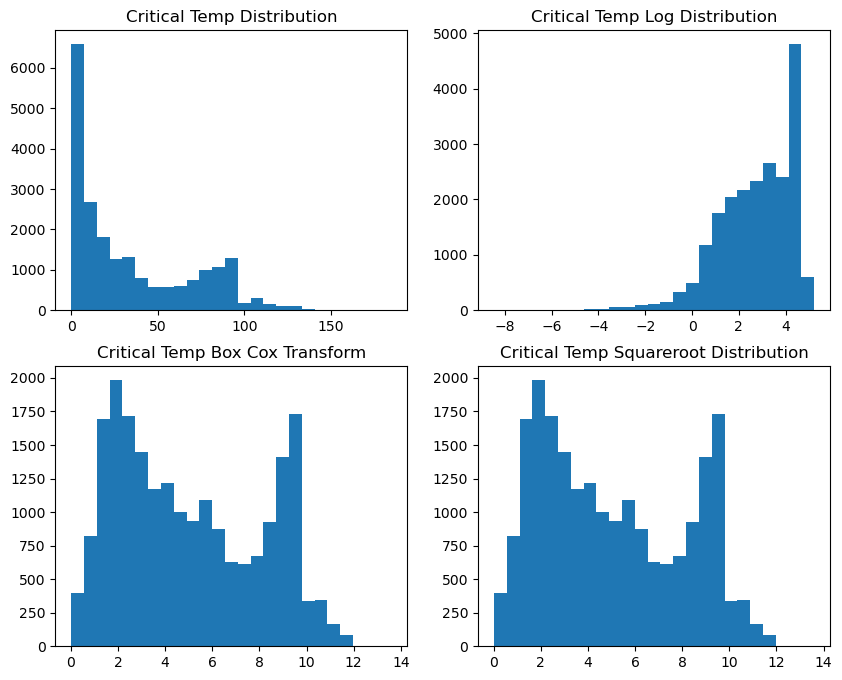

In [88]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

axes[0,0].hist(df['critical_temp'], bins = 25)
axes[0,0].set_title('Critical Temp Distribution')

axes[0,1].hist(np.log(df['critical_temp']), bins = 25)
axes[0,1].set_title('Critical Temp Log Distribution')

axes[1,1].hist(np.sqrt(df['critical_temp']), bins = 25)
axes[1,1].set_title('Critical Temp Squareroot Distribution')

axes[1,0].hist(df['critical_temp_transform'], bins = 25)
axes[1,0].set_title('Critical Temp Box Cox Transform')

plt.show()

In [106]:
df.drop('critical_temp', axis = 1, inplace = True)

<hr>

# <span style = 'color: red'>Section in Question</span>

<hr>

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('critical_temp_transform', axis = 1)
y = df[['critical_temp_transform']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, random_state=12)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)


In [108]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from scipy.special import inv_boxcox, boxcox
import numpy as np

# lambda_val = 0.24233279634159957
alphas = np.logspace(-3, 3, 11)
lasso = LassoCV(cv=5, random_state=12, alphas=alphas)
lasso.fit(X_train_scaled, y_train)

best_alpha = lasso.alpha_
print('Best alpha is:', best_alpha)

print('Training Model:', lasso.score(X_train_scaled, y_train))
print('Testing Model:', lasso.score(X_test_scaled, y_test))

y_pred = lasso.predict(X_test_scaled)

# Calculate RMSE on the test data
rmse = mean_squared_error(y_test, y_pred_new, squared=False)
print(f'Box-Cox: Root Mean Squared Error (RMSE): {rmse:.4f}')

# # Calculate RMSE for training set
# y_train_pred_transformed = lasso.predict(X_train_scaled)
# y_train_pred = inv_boxcox(y_train_pred_transformed, lambda_val)
# rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
# print("RMSE for training set:", rmse_train)

# Calculate RMSE for testing set
y_test_pred_transformed = lasso.predict(X_test_scaled)
y_test_pred = inv_boxcox(y_test_pred_transformed, lambda_val)

# Check for valid values before calculating RMSE
# max_boxcox = np.max(y_train_pred_transformed)
# min_boxcox = np.min(y_train_pred_transformed)

# y_test_pred = np.where(y_test_pred_transformed > max_boxcox, max_boxcox, y_test_pred)
# y_test_pred = np.where(y_test_pred_transformed < min_boxcox, min_boxcox, y_test_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE for testing set:", rmse_test)



c:\Users\Joey\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Joey\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.10898590749366, tolerance: 2.688335864312643
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Joey\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.05982642635081, tolerance: 2.661297115135057
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Joey\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

Best alpha is: 0.003981071705534973
Training Model: 0.7962451655681642
Testing Model: 0.532865368886331
Box-Cox: Root Mean Squared Error (RMSE): 188.1226


ValueError: Input contains NaN.

<hr>

# <span style = 'color:red'> End of section in question </span>

<hr>

# Scaling Data

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract the target variable
target = df['critical_temp_transform']

# Drop the target variable from the DataFrame
features = df.drop(columns=['critical_temp_transform'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training features and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create DataFrames for scaled features
scaled_X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# reset the index for y_train before assigning it
y_train_reset = y_train.reset_index(drop=True)

scaled_X_train_df['critical_temp_transform'] = y_train_reset

# reset the index for y_test before assigning it
y_test_reset = y_test.reset_index(drop=True)

# Create a DataFrame for scaled test features
scaled_X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
scaled_X_test_df['critical_temp_transform'] = y_test_reset

# Correlation Info / Plots

In [110]:
correlation_data = scaled_X_train_df.corr()
correlation_target = correlation_data['critical_temp_transform']

In [111]:
correlation_target.nsmallest(10)

wtd_mean_Valence          -0.689833
wtd_gmean_Valence         -0.678310
mean_Valence              -0.663196
wtd_gmean_Density         -0.649834
gmean_Density             -0.649139
gmean_Valence             -0.641999
wtd_mean_Density          -0.549886
wtd_gmean_atomic_radius   -0.489386
wtd_gmean_atomic_mass     -0.483234
mean_Density              -0.481751
Name: critical_temp_transform, dtype: float64

In [112]:
correlation_target.nlargest(15)

critical_temp_transform        1.000000
wtd_std_ThermalConductivity    0.743065
range_atomic_radius            0.730555
range_ThermalConductivity      0.722932
wtd_std_atomic_radius          0.684697
std_ThermalConductivity        0.683684
wtd_entropy_atomic_mass        0.682532
range_fie                      0.679746
entropy_Valence                0.672623
number_of_elements             0.668776
wtd_entropy_atomic_radius      0.666947
wtd_std_fie                    0.664384
wtd_entropy_Valence            0.646317
std_atomic_radius              0.643538
entropy_fie                    0.643327
Name: critical_temp_transform, dtype: float64

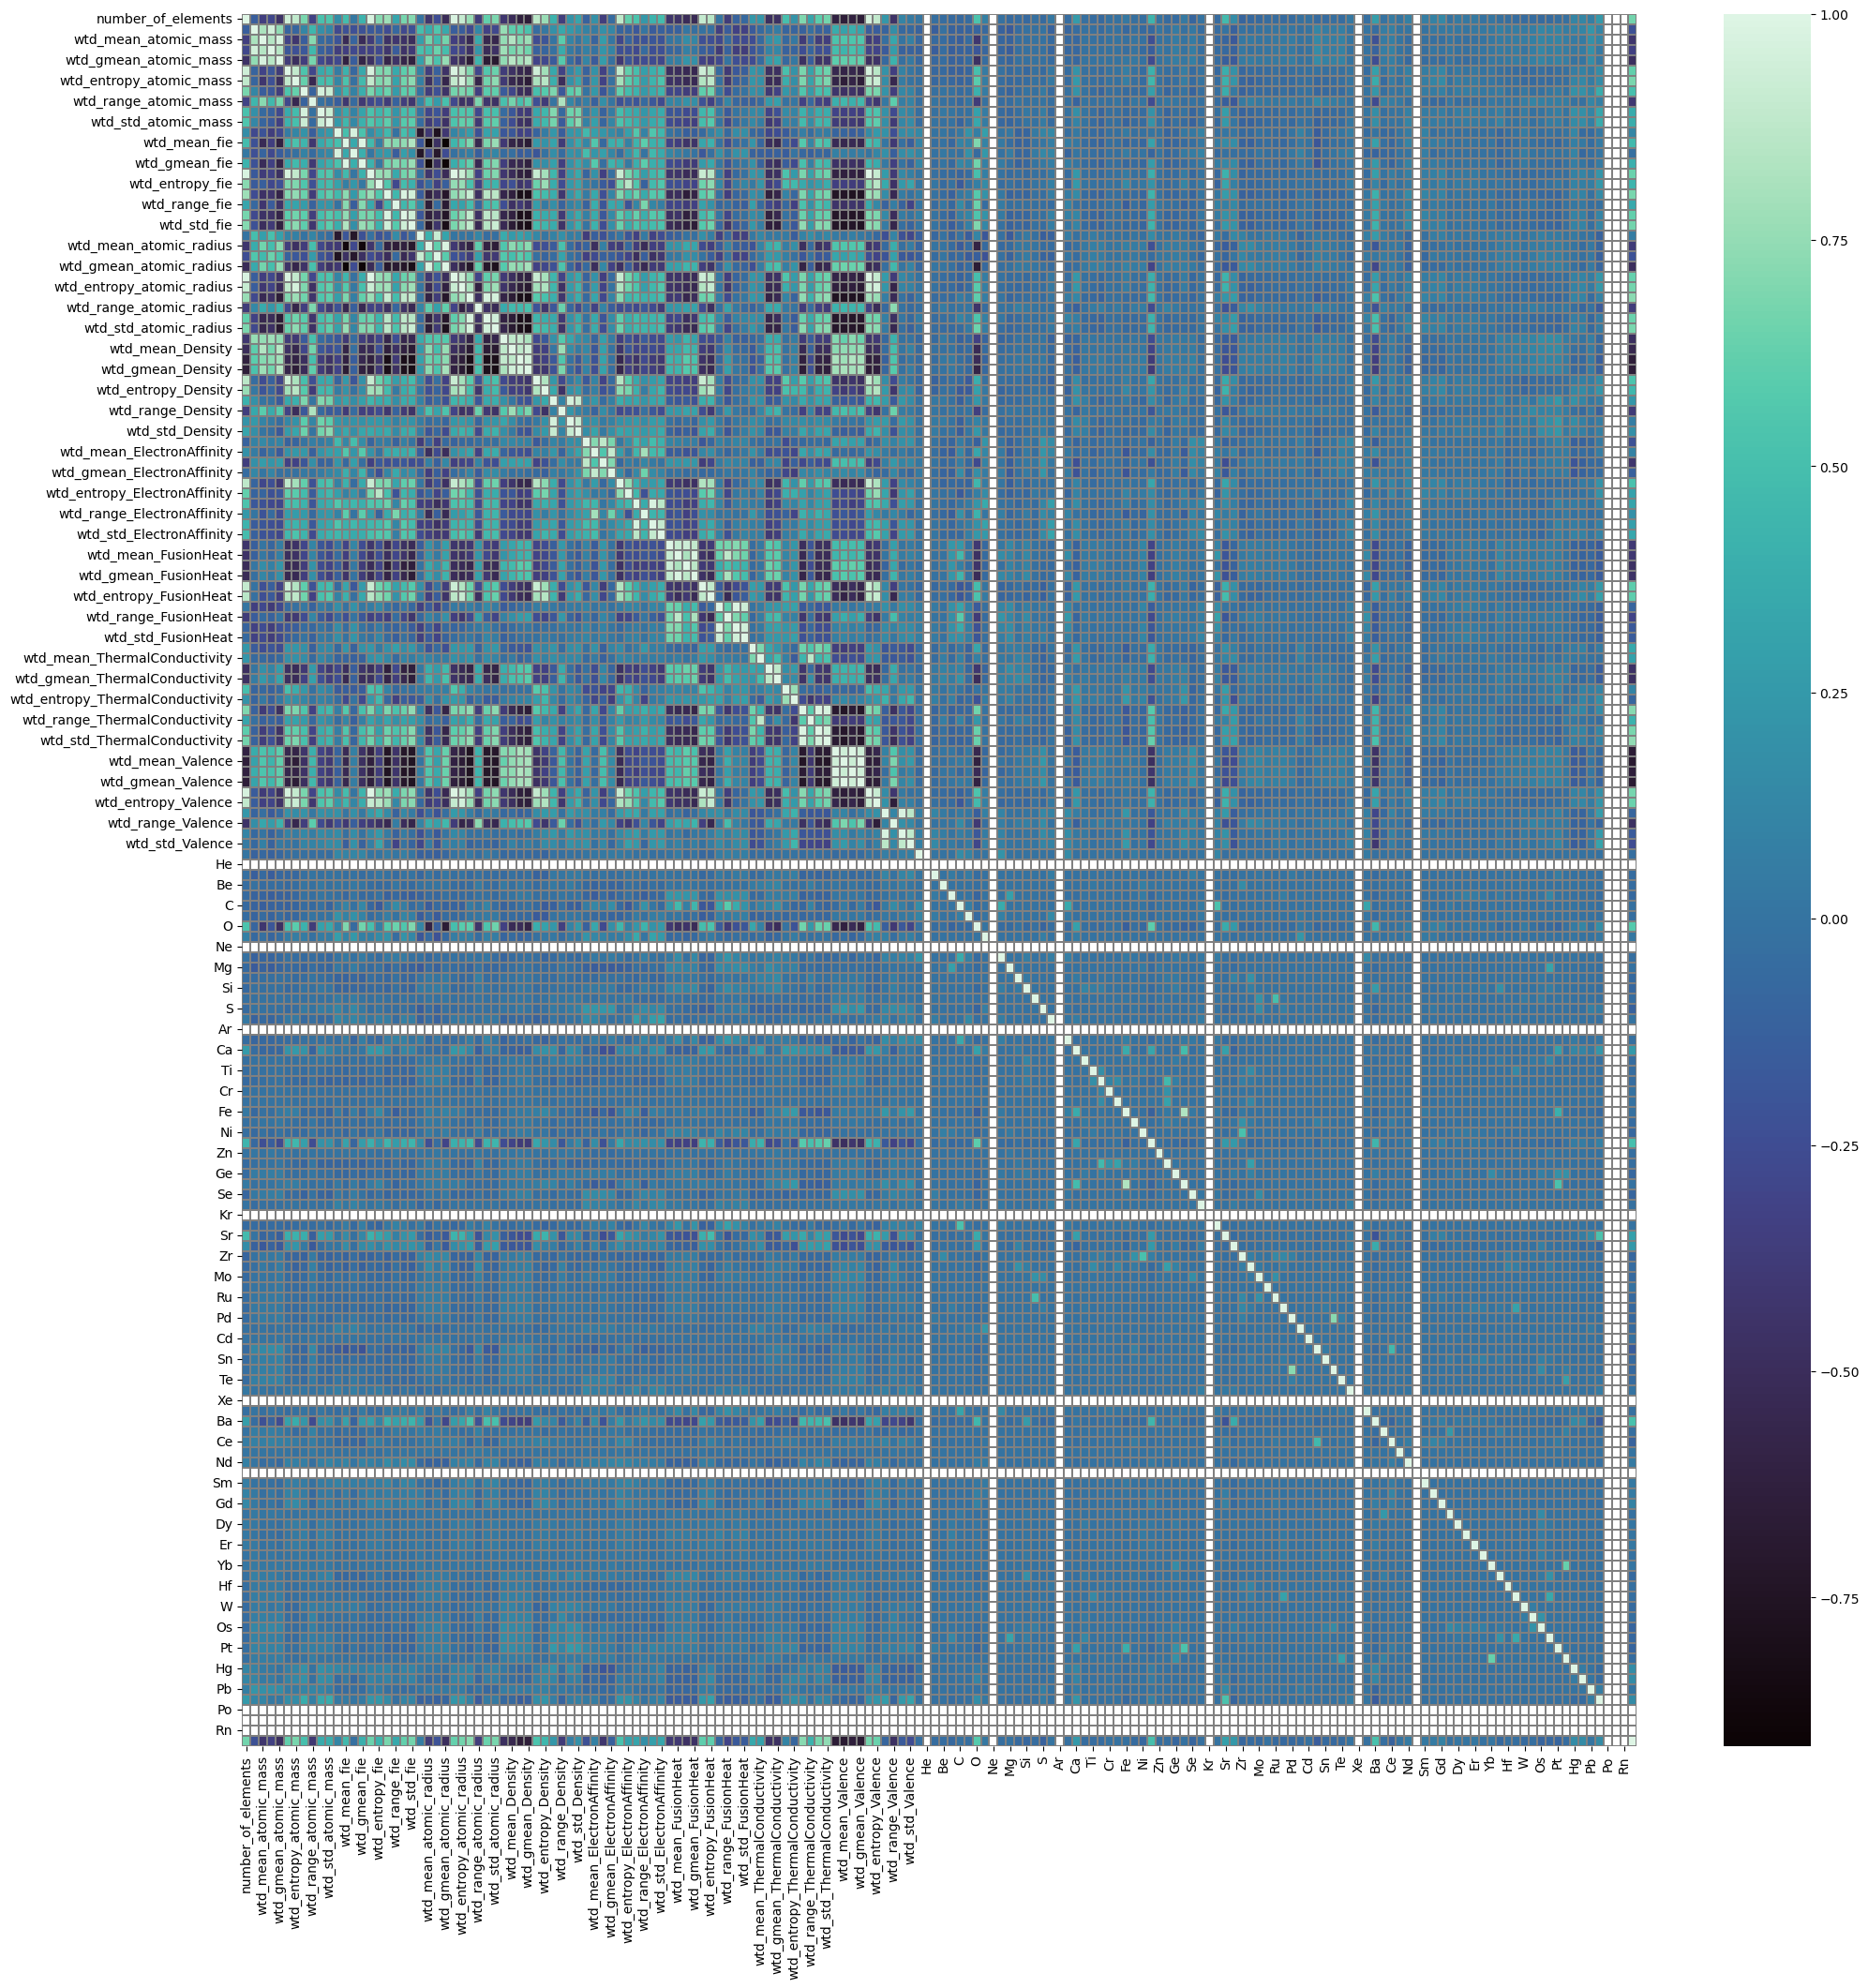

In [85]:
plt.figure(figsize=(24,24))
sns.heatmap(correlation_data,linecolor='grey', cmap = 'mako', linewidths=.01)
plt.show()

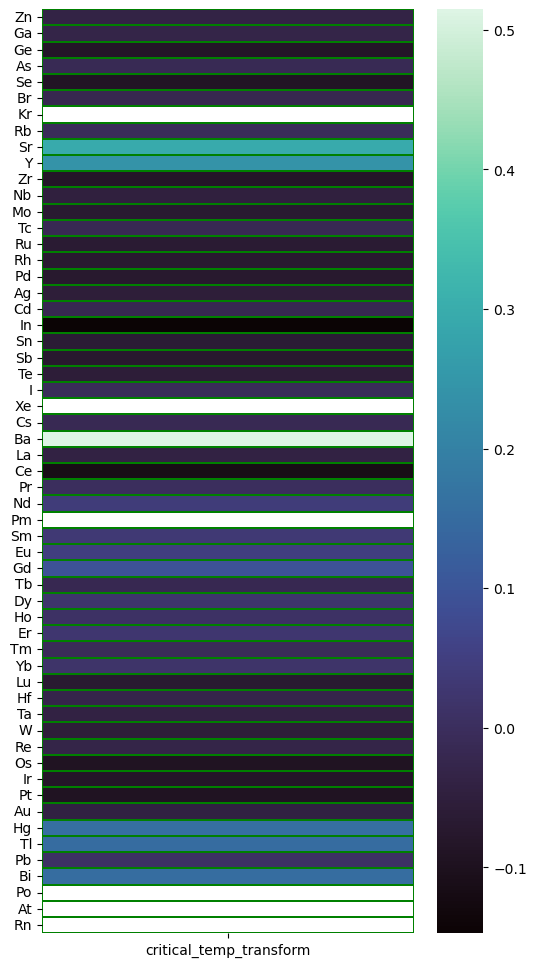

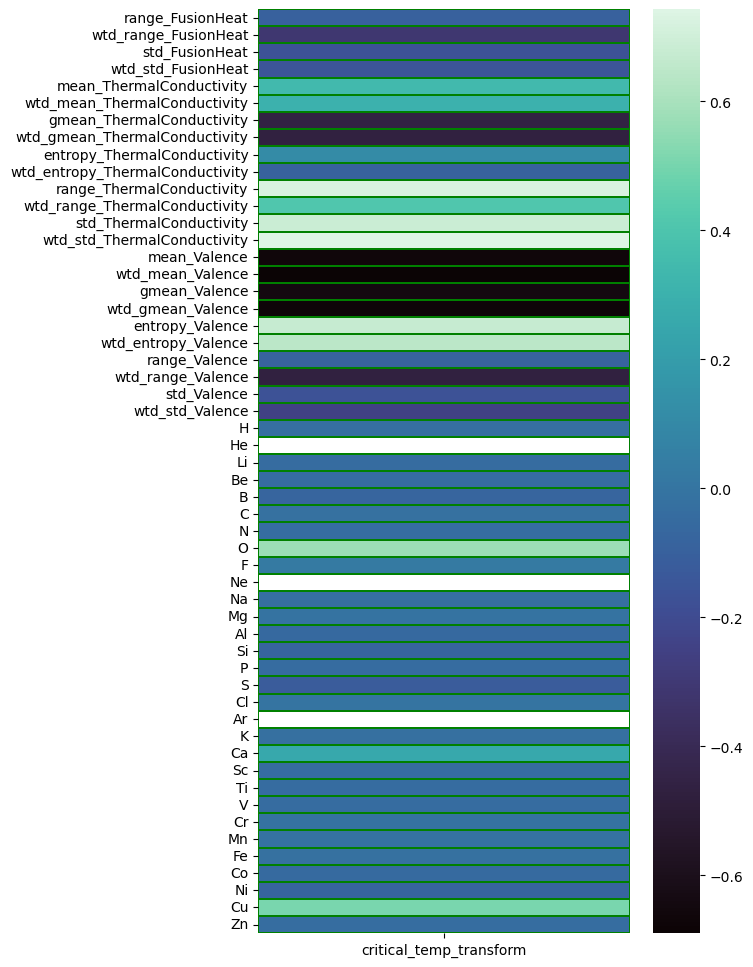

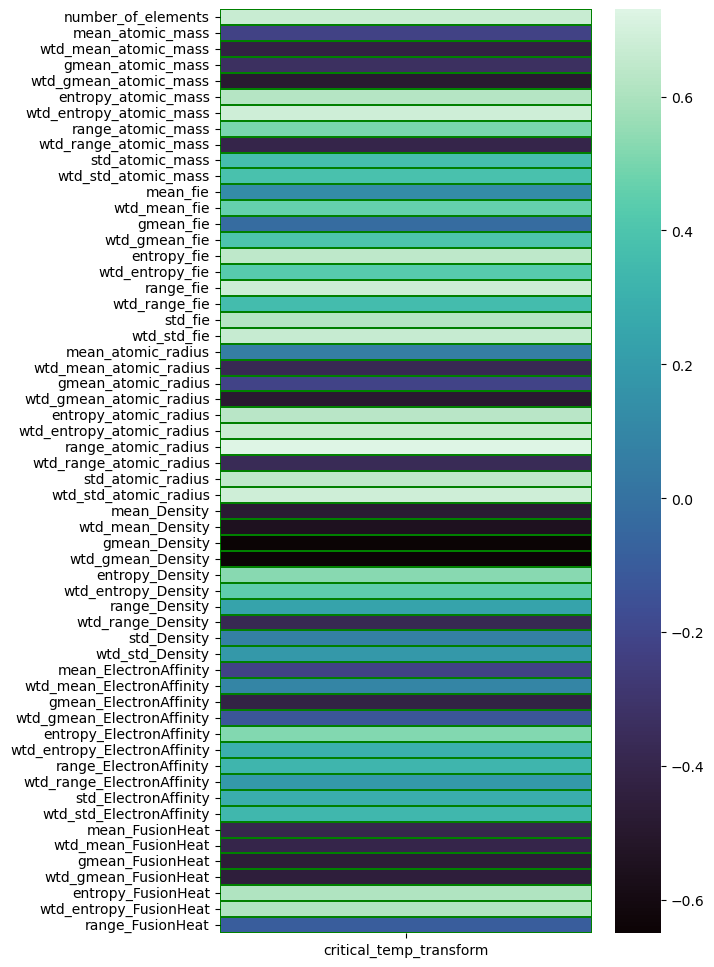

In [113]:
plt.figure(figsize=(6,12))
sns.heatmap(correlation_data.iloc[110:167,167:168] ,linecolor='green', cmap = 'mako', linewidths=.1)
plt.show()

plt.figure(figsize=(6,12))
sns.heatmap(correlation_data.iloc[57:111,167:168] ,linecolor='green', cmap = 'mako', linewidths=.1)
plt.show()

plt.figure(figsize=(6,12))
sns.heatmap(correlation_data.iloc[0:58,167:168] ,linecolor='green', cmap = 'mako', linewidths=.1)
plt.show()

# Modeling
<hr>

## L1 Regularization - Lasso

# <span style = 'color:red'> Changes to make for L1 - Lasso </span>

- The alpha gridsearch needs to be changed. 
- Can add a plot for the alpha grid search / scoring function

In [114]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create a Lasso regression model
lasso = Lasso()

# Define a range of alpha (lambda) values for the GridSearch
alphas = [0.01, 0.05, 0.1, 0.2, 1, 10]

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=lasso, param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha from the search
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha:.6f}')

# Fit Lasso with the best alpha on the entire training data
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = lasso_best.predict(X_test_scaled)

best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha:.6f}")

# Calculate RMSE on the test data
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

selected_features = X_train.columns[lasso_best.coef_ != 0]
print('Selected_features', "\n", selected_features)

Best alpha: 0.010000
Best Alpha: 0.010000
Root Mean Squared Error (RMSE): 1.3640
Selected_features 
 Index(['number_of_elements', 'wtd_entropy_atomic_mass', 'range_atomic_mass',
       'wtd_range_atomic_mass', 'wtd_std_atomic_mass', 'wtd_mean_fie',
       'range_fie', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'range_atomic_radius', 'wtd_std_atomic_radius', 'gmean_Density',
       'wtd_entropy_Density', 'wtd_range_Density', 'wtd_std_Density',
       'wtd_gmean_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'wtd_range_ElectronAffinity', 'std_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'wtd_entropy_FusionHeat', 'wtd_std_FusionHeat',
       'wtd_mean_ThermalConductivity', 'gmean_ThermalConductivity',
       'wtd_gmean_ThermalConductivity', 'entropy_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'wtd_std_ThermalConductivity', 'gmean_Valence', 'range_

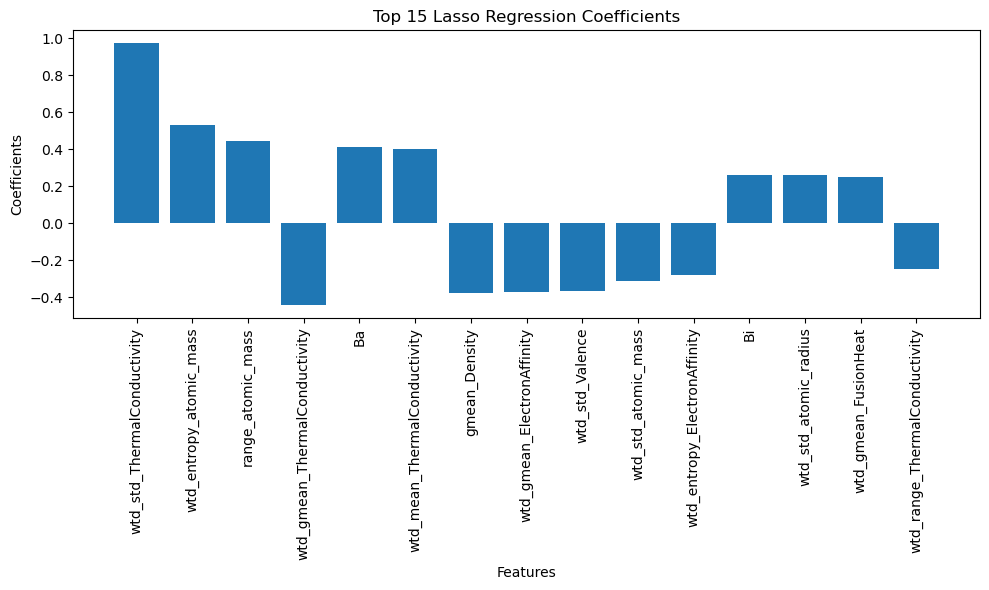

In [88]:
import matplotlib.pyplot as plt

# Get the coefficients from the trained Lasso model
lasso_coefficients = lasso_best.coef_

# Get the corresponding feature names
feature_names = X_train.columns

# Sort the coefficients and feature names together
sorted_indices = abs(lasso_coefficients).argsort()[::-1]
sorted_coefficients = lasso_coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

top_n = 15
top_coefficients = sorted_coefficients[:top_n]
top_feature_names = sorted_feature_names[:top_n]

# Create a coefficient plot for the top 15 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_feature_names)), top_coefficients)
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Top 15 Lasso Regression Coefficients')
plt.tight_layout()
plt.show()

## Grabbing L1 Features to Put into Linear Regression Model

In [89]:
selected_features = ['number_of_elements', 'wtd_entropy_atomic_mass', 'range_atomic_mass',
       'wtd_range_atomic_mass', 'wtd_std_atomic_mass', 'wtd_mean_fie',
       'range_fie', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'range_atomic_radius', 'wtd_std_atomic_radius', 'gmean_Density',
       'wtd_entropy_Density', 'wtd_range_Density', 'wtd_std_Density',
       'wtd_gmean_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'wtd_range_ElectronAffinity', 'std_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'wtd_entropy_FusionHeat', 'wtd_std_FusionHeat',
       'wtd_mean_ThermalConductivity', 'gmean_ThermalConductivity',
       'wtd_gmean_ThermalConductivity', 'entropy_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'wtd_std_ThermalConductivity', 'gmean_Valence', 'range_Valence',
       'wtd_range_Valence', 'wtd_std_Valence', 'H', 'Li', 'Be', 'B', 'C', 'N',
       'Na', 'Mg', 'Si', 'P', 'S', 'Cl', 'K', 'Ti', 'V', 'Mn', 'Fe',
       'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Rb', 'Y', 'Zr', 'Nb', 'Mo',
       'Tc', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Ba', 'La',
       'Ce', 'Pr', 'Nd', 'Gd', 'Tm', 'Yb', 'Lu', 'Hf', 'W', 'Os', 'Hg', 'Tl',
       'Pb', 'Bi']

## Linear Regression - With Lasso Features

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.special import inv_boxcox

X_train_selected = scaled_X_train_df[selected_features]
y_train_selected = scaled_X_train_df['critical_temp_transform']

X_test_selected = scaled_X_test_df[selected_features]
y_test_selected = scaled_X_test_df['critical_temp_transform']

# Add a constant term to the features
X_train_selected_with_const = sm.add_constant(X_train_selected)
X_test_selected_with_const = sm.add_constant(X_test_selected)

linear_model = sm.OLS(y_train_selected, X_train_selected_with_const).fit()

# Print the model summary
print(linear_model.summary())

                               OLS Regression Results                              
Dep. Variable:     critical_temp_transform   R-squared:                       0.777
Model:                                 OLS   Adj. R-squared:                  0.776
Method:                      Least Squares   F-statistic:                     573.4
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                             17:45:11   Log-Likelihood:                -25323.
No. Observations:                    14884   AIC:                         5.083e+04
Df Residuals:                        14793   BIC:                         5.152e+04
Df Model:                               90                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

## Predictions - Linear Regression With Lasso Features

In [91]:
# Calculate predictions on test data
y_pred_transformed = linear_model.predict(X_test_selected_with_const)

# Inverse transform predictions and actual test target values
y_pred_original = inv_boxcox(y_pred_transformed, lambda_value)
y_test_original = inv_boxcox(y_test_selected, lambda_value)

# Calculate Adjusted R-squared
num_features = len(selected_features) + 1  # Including the constant term
adj_r2 = 1 - (1 - linear_model.rsquared) * ((len(y_train_selected) - 1) / (len(y_train_selected) - num_features))

# Calculate RMSE and MSE on the original scale
rmse_original_lasso = mean_squared_error(y_test_original, y_pred_original, squared=False)
mse_original = mean_squared_error(y_test_original, y_pred_original)

print(f'Adjusted R-squared: {adj_r2:.4f}')
print(f'Root Mean Squared Error (RMSE) on Original Scale: {rmse_original_lasso:.4f}')
print(f'Mean Squared Error (MSE) on Original Scale: {mse_original:.4f}')

Adjusted R-squared: 0.7758
Root Mean Squared Error (RMSE) on Original Scale: 16.9704
Mean Squared Error (MSE) on Original Scale: 287.9950


## Model Assumptions Plot - Linear Regression - Lasso

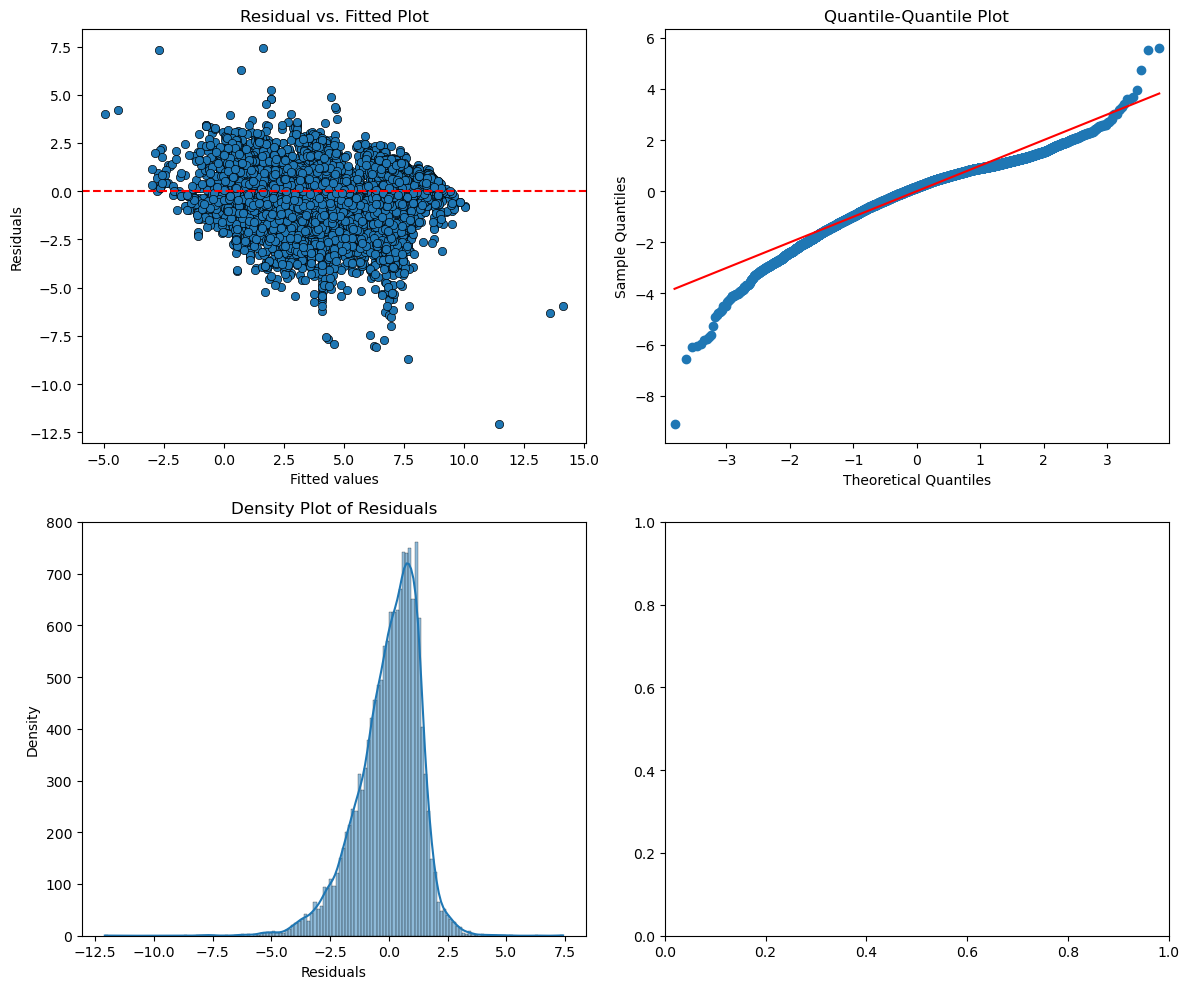

In [92]:
# Calculate residuals
residuals = linear_model.resid

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Residual vs. Fitted Plot
sns.scatterplot(x=linear_model.fittedvalues, y=residuals, edgecolor='k', ax=axes[0, 0])
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residual vs. Fitted Plot')

# Q-Q Plot
sm.qqplot(residuals, line='s', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Quantile-Quantile Plot')

# Density Plot of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Density Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

<hr>

## L2 Regularization - Ridge

In [64]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge = Ridge()

# Define a range of alpha (lambda) values for the GridSearch
alphas = [0.01, 0.05, 0.1, 0.2, 1, 10]

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha from the search
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha:.6f}')

# Fit Ridge with the best alpha on the entire training data
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_L2 = ridge_best.predict(X_test_scaled)

best_alpha_L2 = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha_L2:.6f}")

# Calculate RMSE on the test data
rmse_L2 = mean_squared_error(y_test, y_pred_L2, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse_L2:.4f}')

sorted_indices = np.argsort(np.abs(ridge_best.coef_))[::-1]
top_features = X_train.columns[sorted_indices[:20]] 
print('Top 20 influential features', "\n", top_features)

Best alpha: 0.010000
Best Alpha: 0.010000
Root Mean Squared Error (RMSE): 1.9149
Top 20 influential features 
 [['Rn' 'Po' 'Xe' 'At' 'Kr' 'Pm' 'He' 'Ne' 'Ar' 'Er' 'Al' 'Te' 'V' 'Dy'
  'Au' 'N' 'Mo' 'Re' 'Mn' 'Tb' 'Gd' 'Sc' 'La' 'Cs' 'Sn'
  'wtd_entropy_ThermalConductivity' 'Ta' 'Pb' 'Lu' 'Ga' 'Zr' 'Ca' 'Be'
  'Tc' 'Hg' 'Ir' 'Ti' 'Tm' 'Rh' 'In' 'Co' 'Eu' 'Br' 'Ni' 'Se' 'Ho' 'S'
  'Ru' 'wtd_range_atomic_radius' 'Mg' 'Ge' 'Cr' 'Sm' 'Pd' 'Nd' 'H' 'Os'
  'Yb' 'Nb' 'Sr' 'mean_ThermalConductivity' 'Zn' 'W' 'range_FusionHeat'
  'P' 'Tl' 'Cl' 'Na' 'Pt' 'Cd' 'Hf' 'C' 'B' 'F' 'Y'
  'entropy_ThermalConductivity' 'I' 'gmean_Density' 'Rb' 'Sb' 'Li' 'O'
  'Ce' 'K' 'wtd_range_ElectronAffinity' 'Pr' 'Cu' 'As' 'Ag'
  'range_Density' 'number_of_elements' 'wtd_std_atomic_mass'
  'wtd_range_Valence' 'entropy_FusionHeat' 'Si'
  'gmean_ThermalConductivity' 'gmean_atomic_mass'
  'wtd_mean_ElectronAffinity' 'gmean_ElectronAffinity' 'std_fie'
  'wtd_std_Density' 'Bi' 'std_atomic_radius' 'mean_ElectronAffinity' 

C:\Users\Joey\AppData\Local\Temp\ipykernel_23156\3212753151.py:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  top_features = X_train.columns[sorted_indices[:20]]  # assuming you want top 10 features


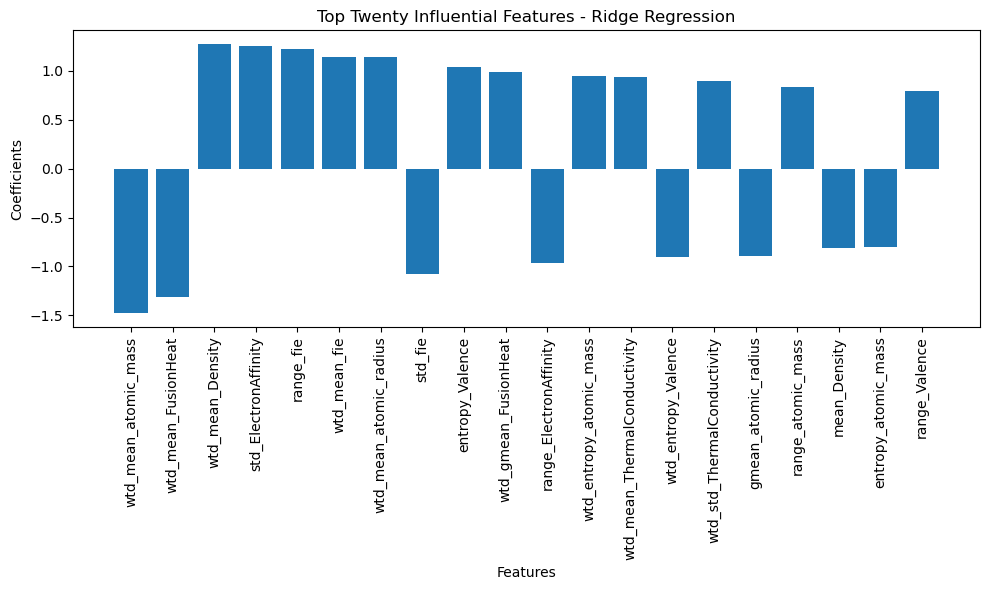

In [94]:
import matplotlib.pyplot as plt

# Get the indices of the top ten influential features
top_indices = sorted_indices[:20]

# Get the coefficients of the top ten influential features
top_coefficients = ridge_best.coef_[top_indices]

# Get the corresponding feature names
top_feature_names = X_train.columns[top_indices]

# Create a coefficient plot for the top ten features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_feature_names)), top_coefficients)
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Top Twenty Influential Features - Ridge Regression')
plt.tight_layout()
plt.show()


In [95]:
selected_features = ['wtd_mean_atomic_mass', 'wtd_mean_FusionHeat', 'wtd_mean_Density',
       'std_ElectronAffinity', 'range_fie', 'wtd_mean_fie',
       'wtd_mean_atomic_radius', 'std_fie', 'entropy_Valence',
       'wtd_gmean_FusionHeat', 'range_ElectronAffinity',
       'wtd_entropy_atomic_mass', 'wtd_mean_ThermalConductivity',
       'wtd_entropy_Valence', 'wtd_std_ThermalConductivity',
       'gmean_atomic_radius', 'range_atomic_mass', 'mean_Density',
       'entropy_atomic_mass', 'range_Valence']

## Linear Regression - Ridge

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.special import inv_boxcox


X_train_selected = scaled_X_train_df[selected_features]
y_train_selected = scaled_X_train_df['critical_temp_transform']

X_test_selected = scaled_X_test_df[selected_features]
y_test_selected = scaled_X_test_df['critical_temp_transform']

# Add a constant term to the features
X_train_selected_with_const = sm.add_constant(X_train_selected)
X_test_selected_with_const = sm.add_constant(X_test_selected)

linear_model = sm.OLS(y_train_selected, X_train_selected_with_const).fit()

# Print the model summary
print(linear_model.summary())

                               OLS Regression Results                              
Dep. Variable:     critical_temp_transform   R-squared:                       0.707
Model:                                 OLS   Adj. R-squared:                  0.707
Method:                      Least Squares   F-statistic:                     1796.
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                             17:45:13   Log-Likelihood:                -27354.
No. Observations:                    14884   AIC:                         5.475e+04
Df Residuals:                        14863   BIC:                         5.491e+04
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

## Predictions - Ridge

In [97]:
# Calculate predictions on test data
y_pred_transformed = linear_model.predict(X_test_selected_with_const)

# Inverse transform predictions and actual test target values
y_pred_original = inv_boxcox(y_pred_transformed, lambda_value)
y_test_original = inv_boxcox(y_test_selected, lambda_value)

# Calculate Adjusted R-squared
num_features = len(selected_features) + 1  # Including the constant term
adj_r2 = 1 - (1 - linear_model.rsquared) * ((len(y_train_selected) - 1) / (len(y_train_selected) - num_features))

# Calculate RMSE and MSE on the original scale
rmse_original_ridge = mean_squared_error(y_test_original, y_pred_original, squared=False)
mse_original = mean_squared_error(y_test_original, y_pred_original)

print(f'Adjusted R-squared: {adj_r2:.4f}')
print(f'Root Mean Squared Error (RMSE) on Original Scale: {rmse_original_ridge:.4f}')
print(f'Mean Squared Error (MSE) on Original Scale: {mse_original:.4f}')

Adjusted R-squared: 0.7069
Root Mean Squared Error (RMSE) on Original Scale: 19.9230
Mean Squared Error (MSE) on Original Scale: 396.9254


## Model Assumptions Plot - Ridge

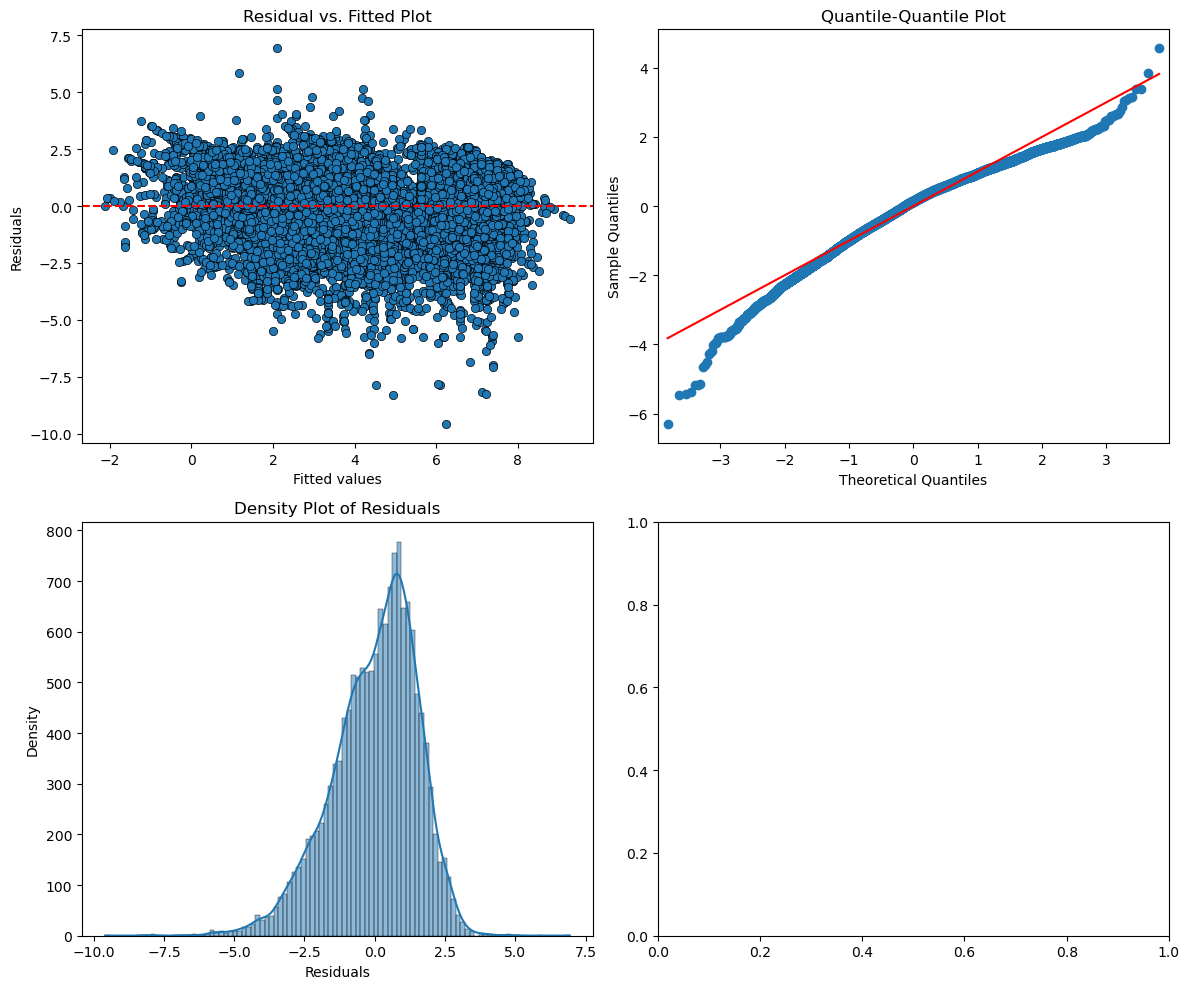

In [98]:
# Calculate residuals
residuals = linear_model.resid

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Residual vs. Fitted Plot
sns.scatterplot(x=linear_model.fittedvalues, y=residuals, edgecolor='k', ax=axes[0, 0])
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residual vs. Fitted Plot')

# Q-Q Plot
sm.qqplot(residuals, line='s', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Quantile-Quantile Plot')

# Density Plot of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Density Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

<hr>

## Penalized Regression - Elastic Net

In [99]:
from sklearn.linear_model import ElasticNet

# Create an Elastic Net regression model
elastic_net = ElasticNet(max_iter=10000)

# Define a range of alpha (lambda) values and l1_ratio values for the GridSearch
alphas = [0.01, 0.05, 0.1, 0.2, 1, 10]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=elastic_net, 
                           param_grid={'alpha': alphas, 'l1_ratio': l1_ratios}, 
                           cv=5, 
                           scoring='neg_mean_squared_error')

# Fit the grid search on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the search
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
print(f'Best alpha: {best_alpha:.6f}')
print(f'Best l1_ratio: {best_l1_ratio:.6f}')

# Fit ElasticNet with the best parameters on the entire training data
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elastic_net_best.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = elastic_net_best.predict(X_test_scaled)

# Calculate RMSE on the test data
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

selected_features = X_train.columns[elastic_net_best.coef_ != 0]
print('Selected_features', "\n", selected_features)

Best alpha: 0.050000
Best l1_ratio: 0.100000
Root Mean Squared Error (RMSE): 1.3764
Selected_features 
 Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass',
       'wtd_range_atomic_mass', 'wtd_std_atomic_mass', 'wtd_mean_fie',
       'gmean_fie',
       ...
       'Hf', 'Ta', 'W', 'Os', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi'],
      dtype='object', length=129)


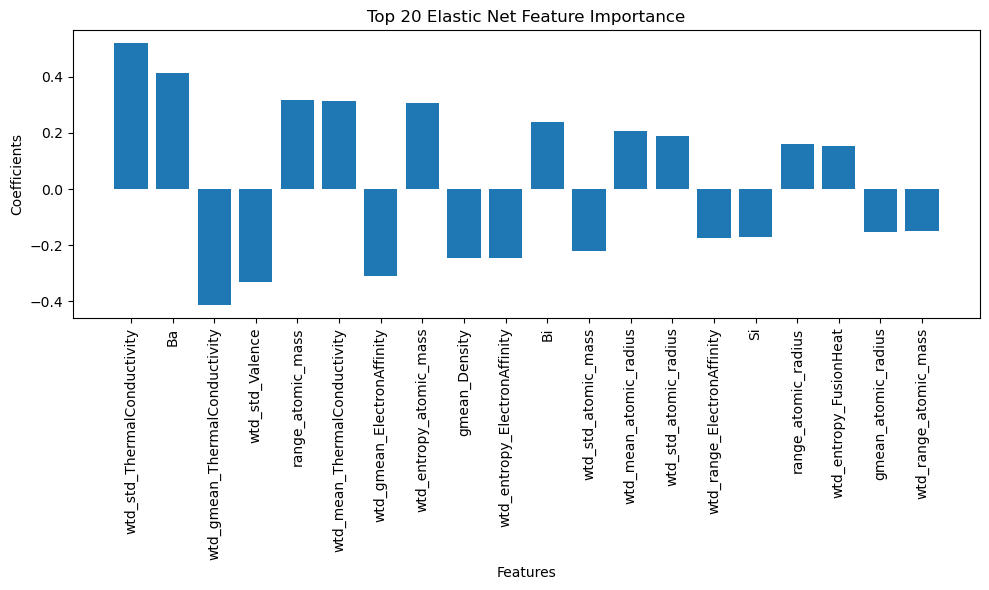

In [101]:
# Get the coefficients from the trained Elastic Net model
elastic_net_coefficients = elastic_net_best.coef_

# Get the corresponding feature names
feature_names = X_train.columns

# Sort the coefficients and feature names together based on absolute coefficient values
sorted_indices = abs(elastic_net_coefficients).argsort()[::-1]
top_indices = sorted_indices[:20]  # Select the top 20 feature indices
top_coefficients = elastic_net_coefficients[top_indices]
top_feature_names = feature_names[top_indices]

# Create a feature importance plot for the top 20 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_feature_names)), top_coefficients)
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Top 20 Elastic Net Feature Importance')
plt.tight_layout()
plt.show()

In [30]:
selected_features = ["number_of_elements", "mean_atomic_mass", "wtd_mean_atomic_mass",
                     "gmean_atomic_mass", "wtd_entropy_atomic_mass", "range_atomic_mass",
                     "wtd_range_atomic_mass", "wtd_std_atomic_mass", "wtd_mean_fie",
                     "gmean_fie", "entropy_fie", "range_fie", "mean_atomic_radius",
                     "wtd_mean_atomic_radius", "gmean_atomic_radius", "wtd_entropy_atomic_radius",
                     "range_atomic_radius", "wtd_std_atomic_radius", "mean_Density",
                     "wtd_mean_Density", "gmean_Density", "wtd_entropy_Density",
                     "wtd_range_Density", "wtd_std_Density", "wtd_mean_ElectronAffinity",
                     "gmean_ElectronAffinity", "wtd_gmean_ElectronAffinity", "wtd_entropy_ElectronAffinity",
                     "wtd_range_ElectronAffinity", "std_ElectronAffinity", "wtd_std_ElectronAffinity",
                     "mean_FusionHeat", "wtd_mean_FusionHeat", "gmean_FusionHeat",
                     "wtd_gmean_FusionHeat", "entropy_FusionHeat", "wtd_entropy_FusionHeat",
                     "range_FusionHeat", "wtd_range_FusionHeat", "std_FusionHeat",
                     "wtd_std_FusionHeat", "mean_ThermalConductivity", "wtd_mean_ThermalConductivity",
                     "gmean_ThermalConductivity", "wtd_gmean_ThermalConductivity", "entropy_ThermalConductivity",
                     "wtd_entropy_ThermalConductivity", "range_ThermalConductivity", "wtd_range_ThermalConductivity",
                     "std_ThermalConductivity", "wtd_std_ThermalConductivity", "gmean_Valence",
                     "wtd_gmean_Valence", "entropy_Valence", "wtd_entropy_Valence",
                     "range_Valence", "wtd_range_Valence", "std_Valence",
                     "wtd_std_Valence", "H", "Li", "Be", "B", "C", "N", "O", "F",
                     "Na", "Mg","Si", "P", "S", "Cl", "K", "Ca", "Sc", "Ti",
                     "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As",
                     "Se", "Br", "Rb", "Sr", "Zr", "Nb", "Mo", "Tc", "Rh", "Pd", "Ag",
                     "Cd", "In", "Sn", "Sb", "I", "Cs", "Ba", "La", "Ce", "Pr", "Nd",
                     "Sm", "Eu", "Gd", "Ho", "Er", "Tm", "Yb", "Lu", "Hf", "Ta", "W",
                     "Os", "Pt", "Au", "Hg", "Tl", "Pb", "Bi"]

## Linear Regression Model - Elastic Net

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.special import inv_boxcox


X_train_selected = scaled_X_train_df[selected_features]
y_train_selected = scaled_X_train_df['critical_temp_transform']

X_test_selected = scaled_X_test_df[selected_features]
y_test_selected = scaled_X_test_df['critical_temp_transform']

# Add a constant term to the features
X_train_selected_with_const = sm.add_constant(X_train_selected)
X_test_selected_with_const = sm.add_constant(X_test_selected)

linear_model = sm.OLS(y_train_selected, X_train_selected_with_const).fit()

# Print the model summary
print(linear_model.summary())

                               OLS Regression Results                              
Dep. Variable:     critical_temp_transform   R-squared:                       0.784
Model:                                 OLS   Adj. R-squared:                  0.782
Method:                      Least Squares   F-statistic:                     418.6
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                             17:16:19   Log-Likelihood:                -25090.
No. Observations:                    14884   AIC:                         5.044e+04
Df Residuals:                        14755   BIC:                         5.142e+04
Df Model:                              128                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

## Predictions - Elastic Net

In [33]:
# Calculate predictions on test data
y_pred_transformed = linear_model.predict(X_test_selected_with_const)

# Inverse transform predictions and actual test target values
y_pred_original = inv_boxcox(y_pred_transformed, lambda_value)
y_test_original = inv_boxcox(y_test_selected, lambda_value)

# Calculate Adjusted R-squared
num_features = len(selected_features) + 1  # Including the constant term
adj_r2 = 1 - (1 - linear_model.rsquared) * ((len(y_train_selected) - 1) / (len(y_train_selected) - num_features))

# Calculate RMSE and MSE on the original scale
rmse_original_elastic = mean_squared_error(y_test_original, y_pred_original, squared=False)
mse_original = mean_squared_error(y_test_original, y_pred_original)

print(f'Adjusted R-squared: {adj_r2:.4f}')
print(f'Root Mean Squared Error (RMSE) on Original Scale: {rmse_original_elastic:.4f}')
print(f'Mean Squared Error (MSE) on Original Scale: {mse_original:.4f}')

Adjusted R-squared: 0.7822
Root Mean Squared Error (RMSE) on Original Scale: 16.7209
Mean Squared Error (MSE) on Original Scale: 279.5886


## Model Assumptions Plot - Elastic Net

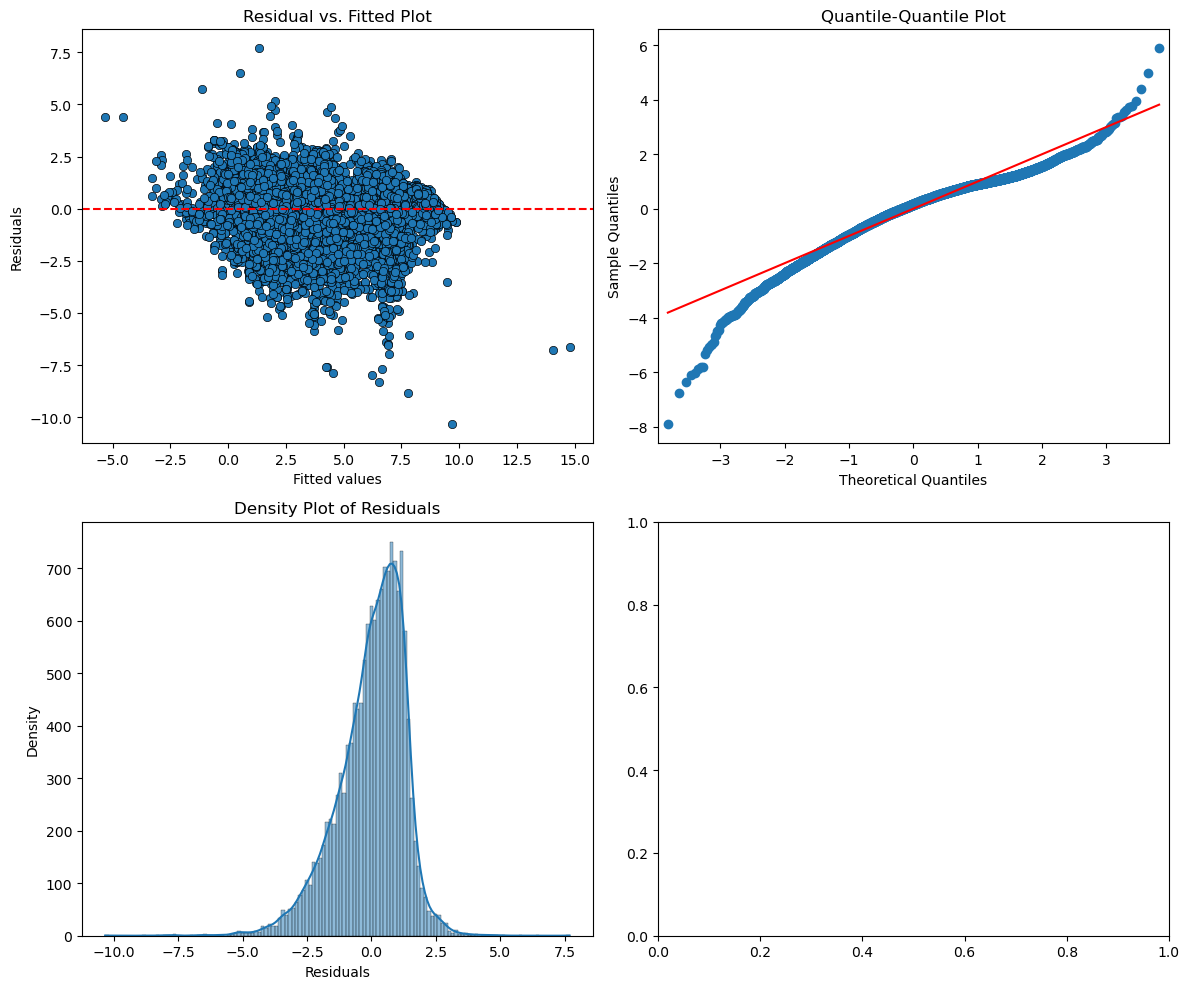

In [34]:
# Calculate residuals
residuals = linear_model.resid

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Residual vs. Fitted Plot
sns.scatterplot(x=linear_model.fittedvalues, y=residuals, edgecolor='k', ax=axes[0, 0])
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residual vs. Fitted Plot')

# Q-Q Plot
sm.qqplot(residuals, line='s', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Quantile-Quantile Plot')

# Density Plot of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Density Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

# Model Scores

In [35]:
print('Lasso Based Linear Regression Model')
print('RMSE: ', rmse_original_lasso,'\n')
print('Ridge Based Linear Regression Model')
print('RMSE: ', rmse_original_ridge,'\n')
print('Elastic Net Linear Regression Model')
print('RMSE: ', rmse_original_elastic)

Lasso Based Linear Regression Model
RMSE:  16.97041450237407 

Ridge Based Linear Regression Model
RMSE:  25.709692067149245 

Elastic Net Linear Regression Model
RMSE:  16.72090212484942


<hr>

# Feature Importance